In [2]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
items=[]

urls = ["https://economictimes.indiatimes.com/sensex-nifty-live-today-2021-06-10/liveblog/83389260.cms", "https://economictimes.indiatimes.com/sensex-nifty-live-today-2021-06-10/liveblog/misd-83389260,curpg-2.cms"]

In [3]:
def page_reader(url):
   
    page_request = requests.get(url)
    data = page_request.content
    soup = BeautifulSoup(data,"html.parser")
    title=soup.title.text

    for article in soup.find_all(class_='eachStory'):
        head=article.h3

        if head is not None:
            #print(head)
            if head.find('a') is None:
                head=str(head)[13:-5]
                items.append(head)
    return items

In [4]:
for url in urls:
    items.extend(page_reader(url))

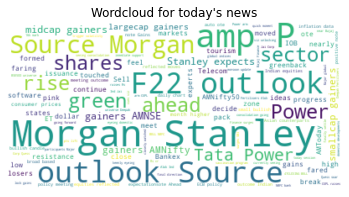

In [5]:
# Creating a corpus of all the news
sents=[]
news=''
ctr=0

sents=[sent for sent in items]
for j in range(len(sents)):
    news=news+str(sents[j])
wowwords=WordCloud(stopwords=ENGLISH_STOP_WORDS.union(['Sensex','Nifty','stock','market','stocks','BSE','NSE','Nifty50','trade','trading','index']), background_color='white').generate(news)

plt.title('Wordcloud for today\'s news')
plt.imshow(wowwords,interpolation='bilinear')
plt.axis('off')
plt.show()

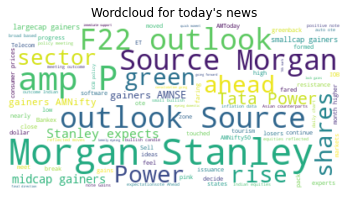

In [6]:
wowwords=WordCloud(stopwords=ENGLISH_STOP_WORDS.union(['Sensex','Nifty','stock','market','stocks','BSE','NSE','Nifty50','trade','trading','index']), background_color='white').generate(news)

plt.title('Wordcloud for today\'s news')
plt.imshow(wowwords,interpolation='bilinear')
plt.axis('off')
plt.show()


# Model

<ipython-input-157-af92580bfd21>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sentiments=pd.Series([])


<ipython-input-7-c08c0a7e4dca>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sentiments=pd.Series([])


<AxesSubplot:ylabel='Density'>

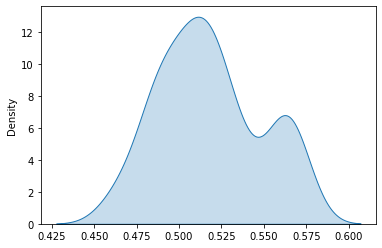

In [7]:
import pandas as pd
items=pd.Series(items)
sentiments=pd.Series([])
for i in range(len(items)):
    t=TextBlob(items.iloc[i])
    sentiments[i]=t.sentiment[0]*(1-t.sentiment[1])
sentiments=sentiments[sentiments!=0]
sentiments=1/(1+np.exp(-sentiments))
sns.kdeplot(sentiments, shade=True)